In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/c/titanic/train.csv
/kaggle/input/c/titanic/test.csv
/kaggle/input/c/titanic/gender_submission.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Dataset 확인

In [3]:
df_train = pd.read_csv('../input/c/titanic/train.csv')
df_test = pd.read_csv('../input/c/titanic/test.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 우리가 다루는 문제에서 feature는 Pclass, Age, SibSp, Parch, Fare 이며, 예측하려는 target label 은 Survived 입니다.

In [5]:
df_train.describe()
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

In [8]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


## Null 값 확인

<AxesSubplot:>

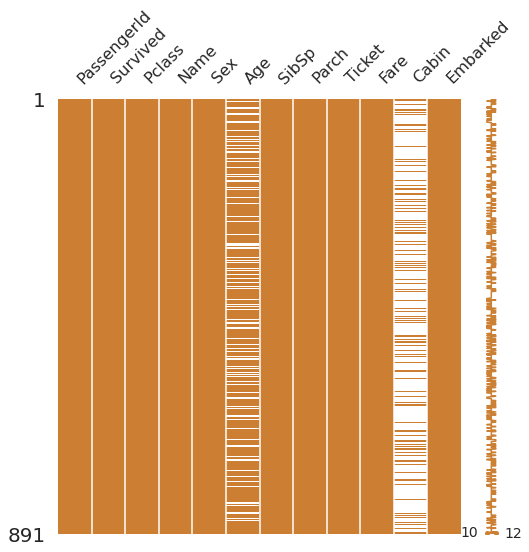

In [9]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8,8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

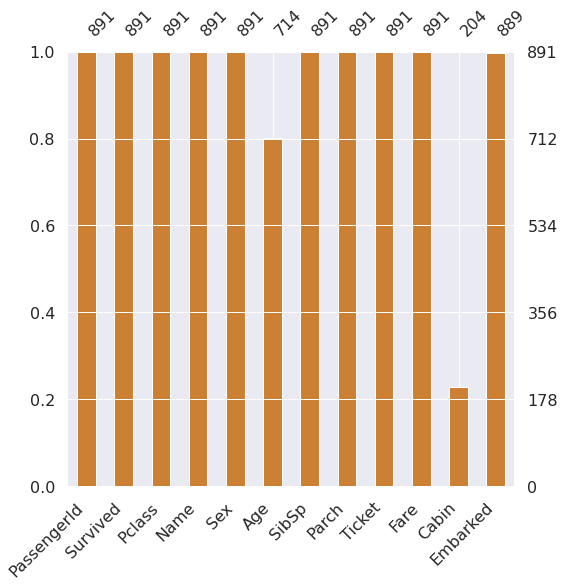

In [10]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))


## Target Label 확인

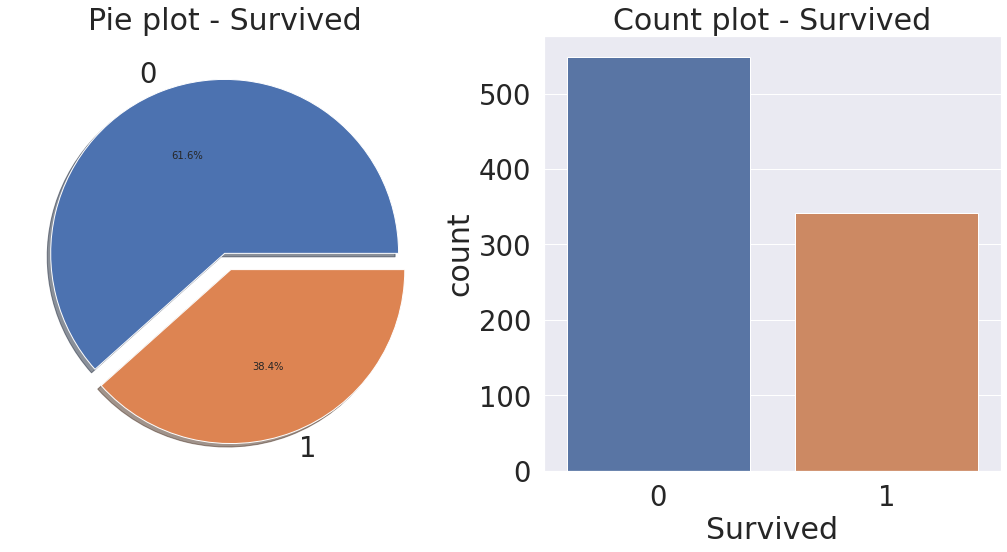

In [11]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

## 1. Pclass와 생존간의 관계 확인

In [12]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [13]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


- pandas 의 crosstab 을 사용하면 좀 더 위 과정을 좀 더 수월하게 볼 수 있습니다.

In [14]:
pd.crosstab(df_train["Pclass"], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

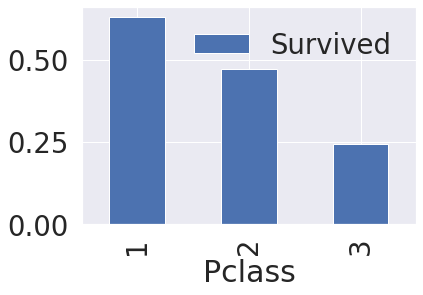

In [15]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

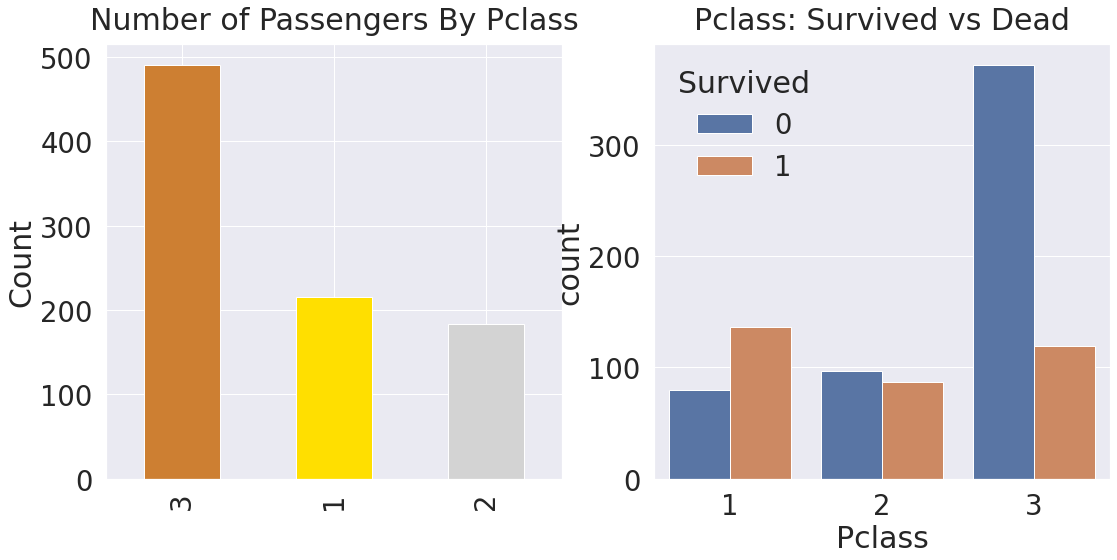

In [16]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

## 2. Sex와 생존간의 관계 확인

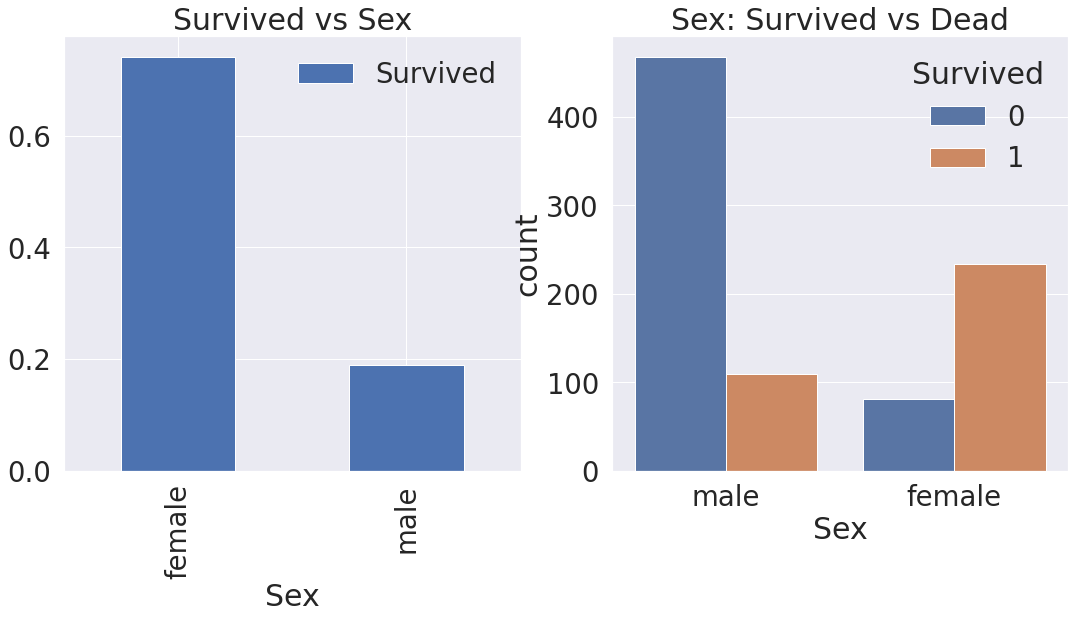

In [17]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

df_train[['Sex','Survived']].groupby(['Sex'],as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived',data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

plt.show()

In [18]:
df_train[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [19]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


## Sex와 Pclass 두개를 사용하여 생존 그래프 그려보기

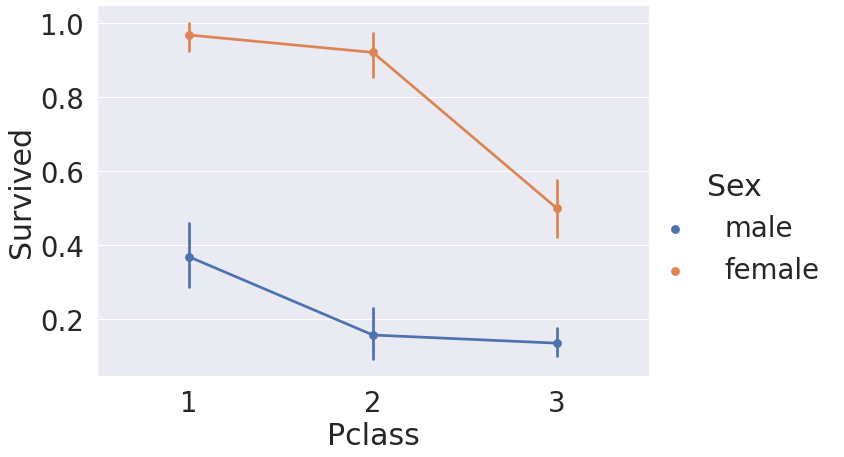

In [20]:
# 평균꺾은선그래프
sns.factorplot('Pclass', 'Survived', hue='Sex', data = df_train,
              size = 6, aspect=1.5)

- 모든 클래스에서 female 이 살 확률이 male 보다 높은 걸 알 수 있습니다.
또한 남자, 여자 상관없이 클래스가 높을 수록 살 확률 높습니다.
위 그래프는 hue 대신 column 으로 하면 아래와 같아집니다

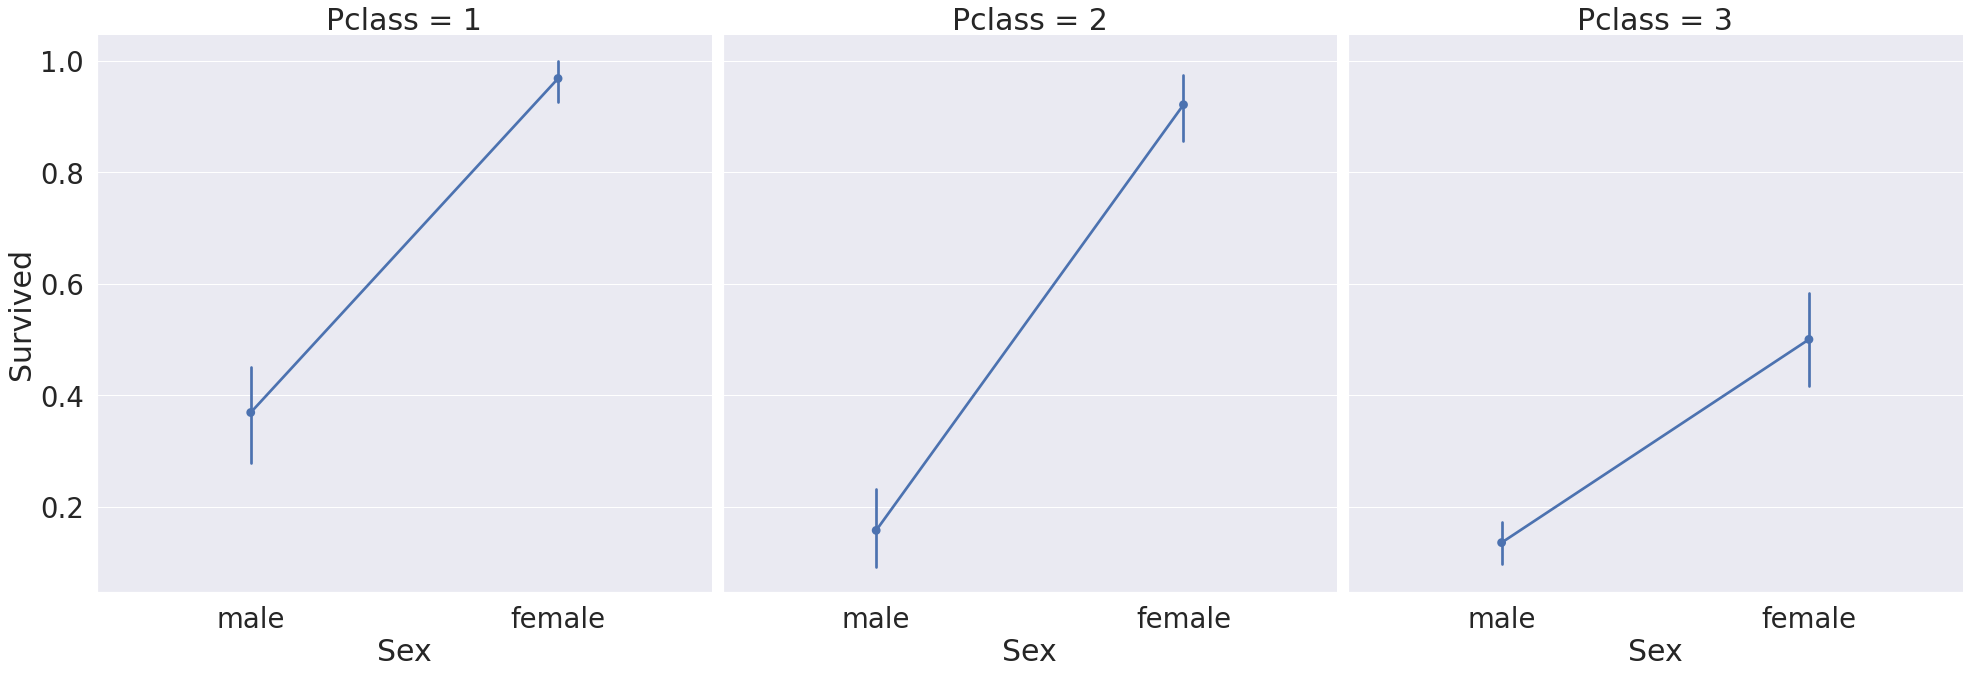

In [21]:
# 평균꺾은선그래프
sns.factorplot(x='Sex', y='Survived', col='Pclass',
              data=df_train, satureation=.5,
               size=9, aspect=1
              )

## 3. Age 피쳐 확인

In [24]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))


제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


<function matplotlib.pyplot.show(close=None, block=None)>

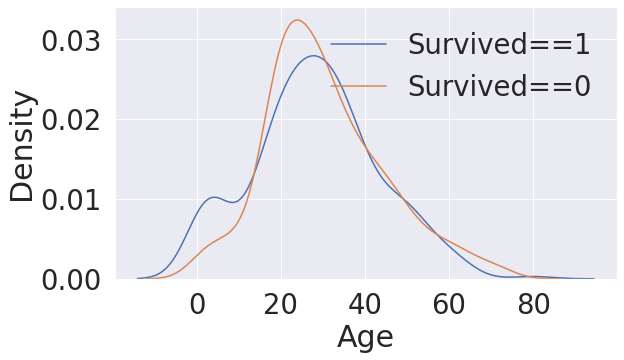

In [31]:
# 생존에 따른 AGE의 히스토그램

fig, ax = plt.subplots(1,1, figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'], ax=ax)
plt.legend(['Survived==1', 'Survived==0'])
plt.show

- 생존자 중 나이가 어린 경우가 많음을 볼 수 있습니다.

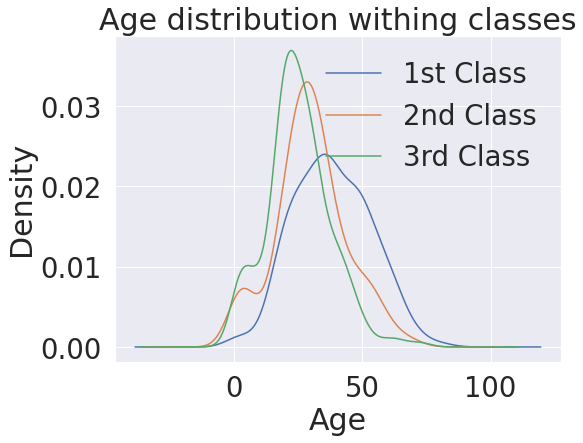

In [44]:
# Age distribution withing classes

plt.figure(figsize=(8,6))

df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age distribution withing classes')
plt.legend(['1st Class','2nd Class','3rd Class'])
plt.show()

- Class가 높을수록 나이 많은 사람의 비중이 커짐
- 나이대가 변하면서 생존률이 어떻게 되는지 보려고 합니다.
- 나이범위를 점점 넓혀가며 생존률이 어떻게 되는지 한번 보겠습니다.

### 나이에 따른 생존률의 변화

In [46]:
cummulate_survival_ratio = []
for i in range(1,80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
cummulate_survival_ratio

[1.0,
 0.8571428571428571,
 0.625,
 0.6666666666666666,
 0.675,
 0.7045454545454546,
 0.7021276595744681,
 0.68,
 0.6666666666666666,
 0.6129032258064516,
 0.59375,
 0.5735294117647058,
 0.5797101449275363,
 0.5915492957746479,
 0.5769230769230769,
 0.5903614457831325,
 0.55,
 0.5398230088495575,
 0.5035971223021583,
 0.4817073170731707,
 0.45555555555555555,
 0.4264705882352941,
 0.42424242424242425,
 0.41700404858299595,
 0.4244604316546763,
 0.4119601328903654,
 0.40752351097178685,
 0.41839762611275966,
 0.4065934065934066,
 0.40625,
 0.40389294403892945,
 0.40654205607476634,
 0.4107142857142857,
 0.4103671706263499,
 0.4091858037578288,
 0.4164989939637827,
 0.41923076923076924,
 0.41634980988593157,
 0.4171322160148976,
 0.41560798548094374,
 0.41519434628975266,
 0.4143356643356643,
 0.4153846153846154,
 0.4135593220338983,
 0.41235392320534225,
 0.4110929853181077,
 0.4090909090909091,
 0.4048,
 0.4085173501577287,
 0.4109375,
 0.4123076923076923,
 0.410958904109589,
 0.411764

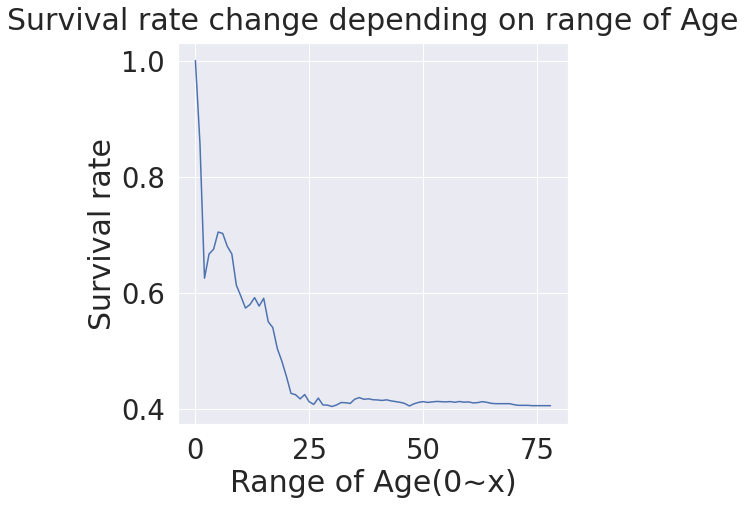

In [47]:
plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

- 보시다시피, 나이가 어릴수록 생존률이 확실히 높은 것을 확인할 수 있습니다.
- 우리는 이 나이가 중요한 피쳐로 쓰일 수 있음을 확인했습니다.


## 4. Pclass, Sex, Age
- 지금까지 본 Sex, Pclass, Age, Survived 모두에 대해서 보려고합니다. 이를 쉽게 그려주는 것이 seaborn의 violinplot입니다.
- x축은 우리가 나눠서 보고 싶어하는 case(여기서는 Pclass, Sex)를 나타내고, y축은 보고 싶어하는 distribution(Age)입니다.


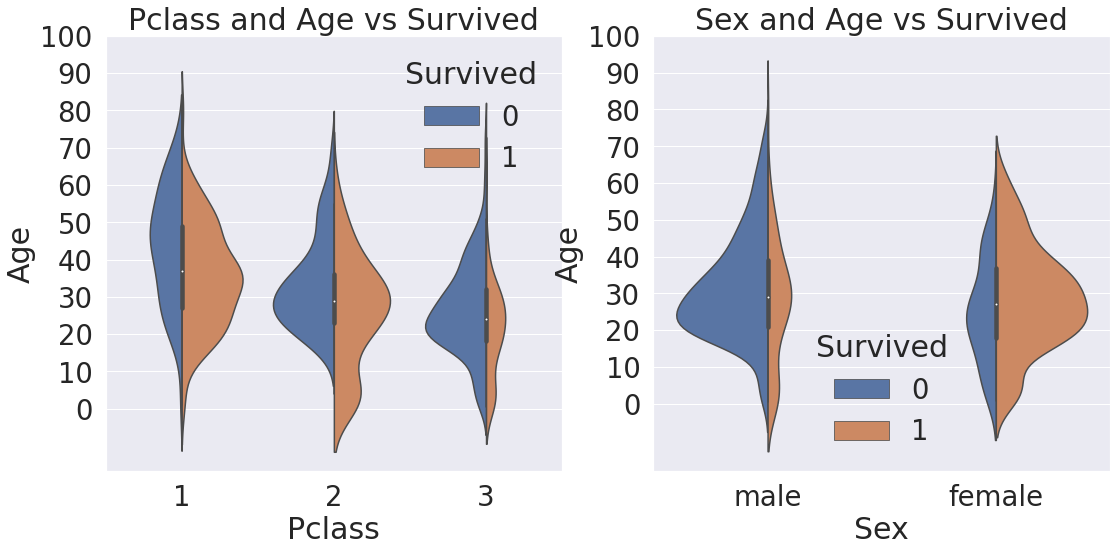

In [53]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

sns.violinplot('Pclass','Age',hue='Survived', data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot('Sex','Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))

- 왼쪽 그림은 Pclass 별로 Age의 distribution 이 어떻게 다른지, 거기에 생존여부에 따라 구분한 그래프입니다.
- 오른쪽 그림도 마찬가지 Sex, 생존에 따른 distribution 이 어떻게 다른지 보여주는 그래프입니다.
- 생존만 봤을 때, 모든 클래스에서 나이가 어릴 수록 생존을 많이 한것을 볼 수 있습니다.
- 오른쪽 그림에서 보면, 명확히 여자가 생존을 많이 한것을 볼 수 있습니다.
- 여성과 아이를 먼저 챙긴 것을 볼 수 있습니다.

## 4. Embarked
- Embarked는 탑승항구를 나타냅니다.
- 위에서 해왔던 것처럼 탑승한 곳에 따른 생존률을 보겠습니다.

<AxesSubplot:xlabel='Embarked'>

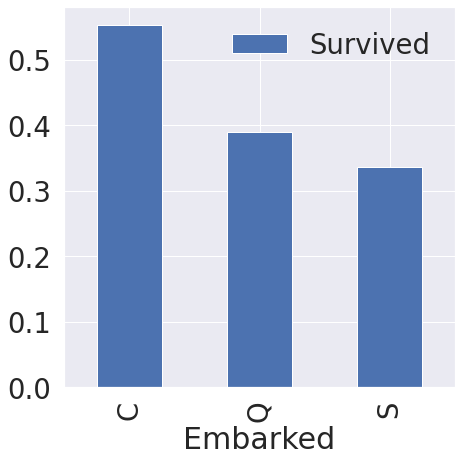

In [56]:
f, ax = plt.subplots(1,1, figsize=(7,7))
df_train[['Embarked','Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

- 보시다시피, 조금의 차이는 있지만 생존률은 좀 비슷한 거 같습니다. 그래도 C가 제일 높군요.
- 모델에 얼마나 큰 영향을 미칠지는 모르겠지만, 그래도 사용하겠습니다.
- 사실, 모델을 만들고 나면 우리가 사용한 feature 들이 얼마나 중요한 역할을 했는지 확인해볼 수 있습니다. 이는 추후에 모델을 만들고 난 다음에 살펴볼 것입니다.
- 다른 feature 로 split 하여 한번 살펴보겠습니다

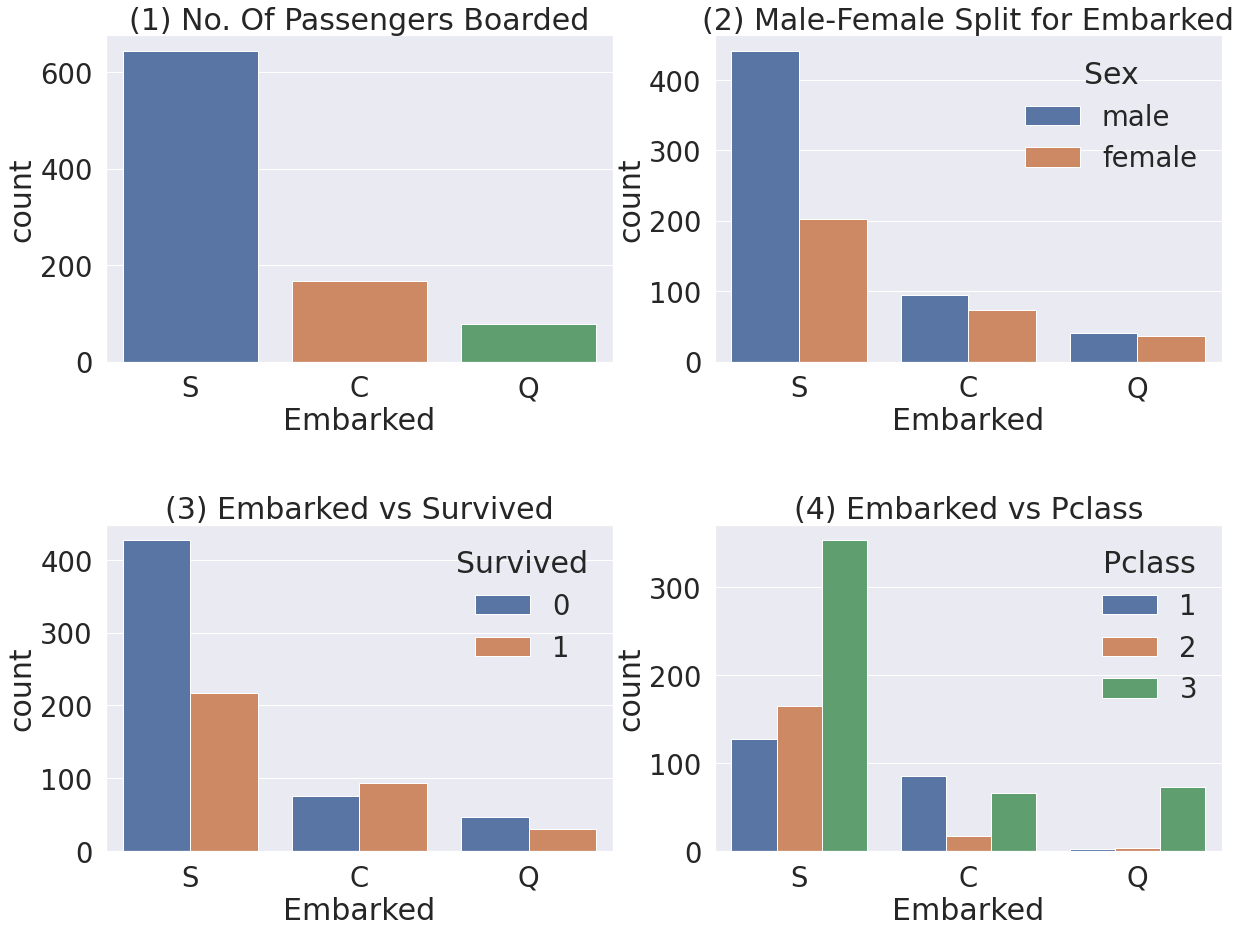

In [65]:
f, ax = plt.subplots(2,2,figsize=(20,15))

sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- Figure(1) - 전체적으로 봤을 때, S 에서 가장 많은 사람이 탑승했습니다.
- Figure(2) - C와 Q 는 남녀의 비율이 비슷하고, S는 남자가 더 많습니다.
- Figure(3) - 생존확률이 S 경우 많이 낮은 걸 볼 수 있습니다. (이전 그래프에서 봤었습니다)
- Figure(4) - Class 로 split 해서 보니, C가 생존확률이 높은건 클래스가 높은 사람이 많이 타서 그렇습니다. S는 3rd class 가 많아서 생존확률이 낮게 나옵니다.

## 5. 가족관계에 따른 생존률을 살표본다.
Family = Sibsp(형제 자매) + Parch(부모, 자녀)
- Family로 합쳐서 분석을 해보자

In [68]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신 포함 : +1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # 자신 포함 : +1
print(df_train['FamilySize'])

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: FamilySize, Length: 891, dtype: int64


In [70]:
print('Max_of_FamilySize : ', df_train['FamilySize'].max())
print('Min_of_FamilySize : ', df_train['FamilySize'].min())

Max_of_FamilySize :  11
Min_of_FamilySize :  1


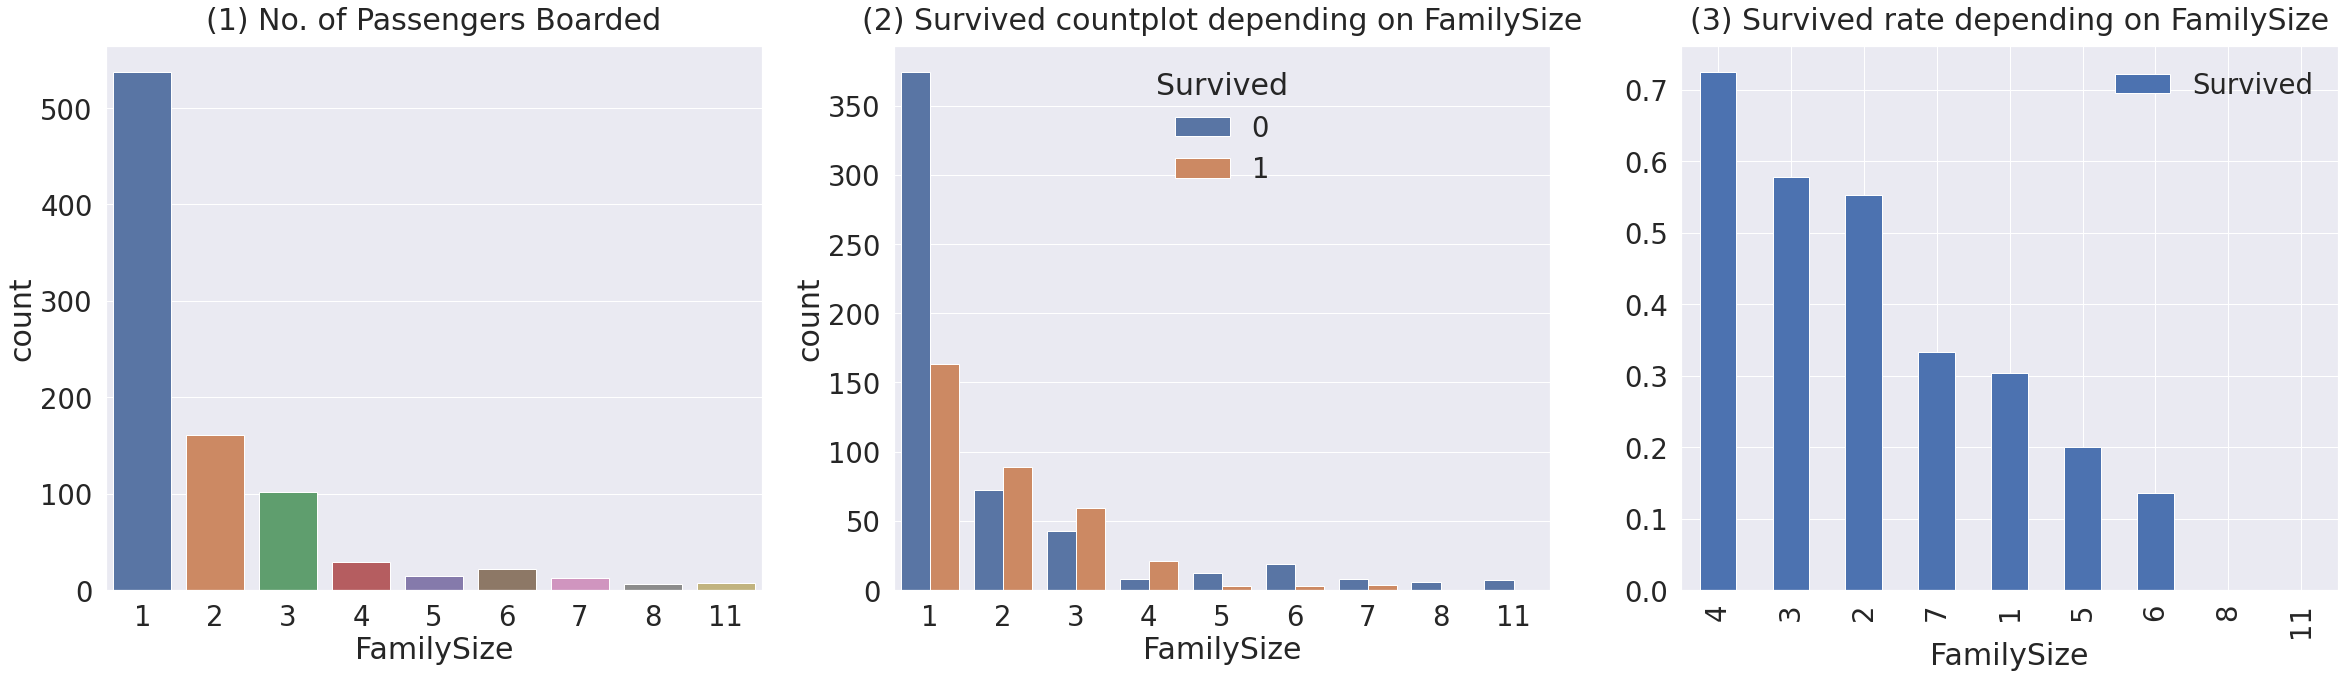

In [74]:
f, ax = plt.subplots(1, 3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- Figure (1) - 가족크기가 1~11까지 있음을 볼 수 있습니다. 대부분 1명이고 그 다음으로 2, 3, 4명입니다.
- Figure (2), (3) - 가족 크기에 따른 생존비교입니다. 가족이 4명인 경우가 가장 생존확률이 높습니다. 가족수가 많아질수록, (5, 6, 7, 8, 11) 생존확률이 낮아지네요. 가족수가 너무 작아도(1), 너무 커도(5, 6, 8, 11) 생존 확률이 작네요. 3~4명 선에서 생존확률이 높은 걸 확인할 수 있습니다.

## 6. Fare 운임요금

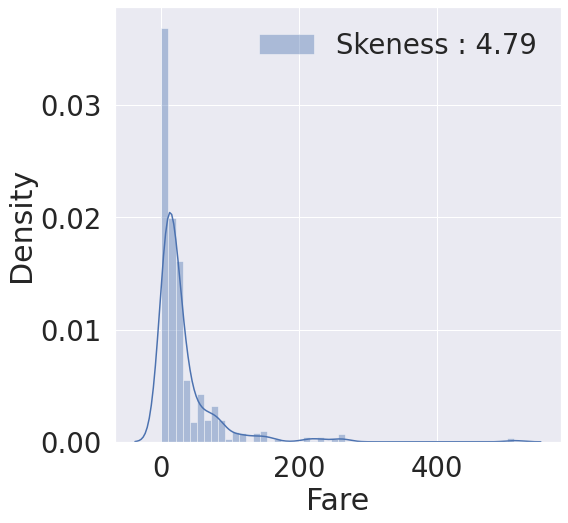

In [79]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skeness : {:.2f}'.format(df_train['Fare'].skew()),ax=ax)
g = g.legend(loc='best')

- 보시다시피, distribution이 매우 비대칭인 것을 알 수 있습니다.(high skewness). 만약 이대로 모델에 넣어준다면 자칫 모델이 잘못 학습할 수도 있습니다. 몇개 없는 outlier 에 대해서 너무 민감하게 반응한다면, 실제 예측 시에 좋지 못한 결과를 부를 수 있습니다.
- outlier의 영향을 줄이기 위해 Fare 에 log 를 취하겠습니다.
- 여기서 우리는 pandas 의 유용한 기능을 사용할 겁니다. dataFrame 의 특정 columns 에 공통된 작업(함수)를 적용하고 싶으면 아래의 map, 또는 apply 를 사용하면 매우 손쉽게 적용할 수 있습니다.
- 우리가 지금 원하는 것은 Fare columns 의 데이터 모두를 log 값 취하는 것인데, 파이썬의 간단한 lambda 함수를 이용해 간단한 로그를 적용하는 함수를 map 에 인수로 넣어주면, Fare columns 데이터에 그대로 적용이 됩니다. 매우 유용한 기능이니 꼭 숙지하세요!


 ** skewness : 왜곡

In [81]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean() # testset 에 있는 nan value 를 평균값으로 치환합니다.
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0) # 0보다 크면 로그해줌
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

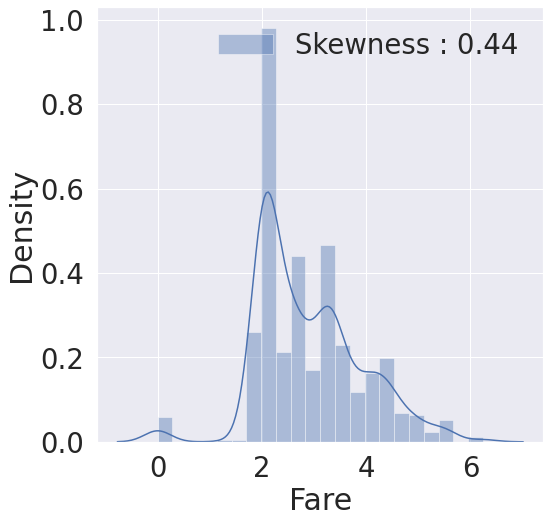

In [82]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- log 를 취하니, 이제 비대칭성이 많이 사라진 것을 볼 수 있습니다.
- 우리는 이런 작업을 사용해 모델이 좀 더 좋은 성능을 내도록 할 수 있습니다.
- 사실 방금한 것은 feature engineering 에 들어가는 부분인데, 여기서 작업했습니다.
- 모델을 학습시키기 위해, 그리고 그 모델의 성능을 높이기 위해 feature 들에 여러 조작을 가하거나, 새로운 feature를 추가하는 것을 feature engineering 이라고 하는데, 우리는 이제 그것을 살펴볼 것입니다.